<a href="https://colab.research.google.com/github/Aa1609/YBI_foundation_Final_Project/blob/main/Mielage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mielage Prediction - Regression Analysis

## 1. Objective:

The objective of the Mileage Prediction - Regression Analysis project is to develop a robust regression model that accurately predicts the mileage (fuel efficiency) of vehicles based on various input features. By leveraging historical data on different vehicles, such as model_year, weight, horsepower, and other relevant attributes, the project aims to build a predictive model that can assist individuals, automobile manufacturers, and policymakers in making informed decisions related to fuel consumption, environmental impact, and overall vehicle performance.

The regression analysis will involve exploring the relationship between the dependent variable (mileage) and the independent variables (vehicle features). Through data preprocessing, feature selection, and engineering, the project seeks to identify the most influential factors affecting mileage and uncover potential patterns and insights within the dataset. Subsequently, the chosen regression model will be trained, validated, and fine-tuned to achieve optimal accuracy and generalization.

The success of this project will be measured by evaluating the model's performance on both training and test datasets using appropriate regression evaluation metrics. The ultimate goal is to deliver a reliable mileage prediction model that can be deployed in real-world scenarios to help consumers compare fuel efficiency, guide vehicle design improvements, and contribute to environmental sustainability by promoting the use of more fuel-efficient vehicles.

## 2. Data Source
The dataset was taken from YBI foundation's GIT HUB account. Here's the link for the same:
https://github.com/YBI-Foundation/Dataset/blob/main/MPG.csv


# Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

# Import Data

In [6]:
data = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [7]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Describe Data

In [8]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
data.corr()

<ipython-input-10-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


# Data Preprocessing
### Removing missing values

In [12]:
data=data.dropna()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# Data Visualization

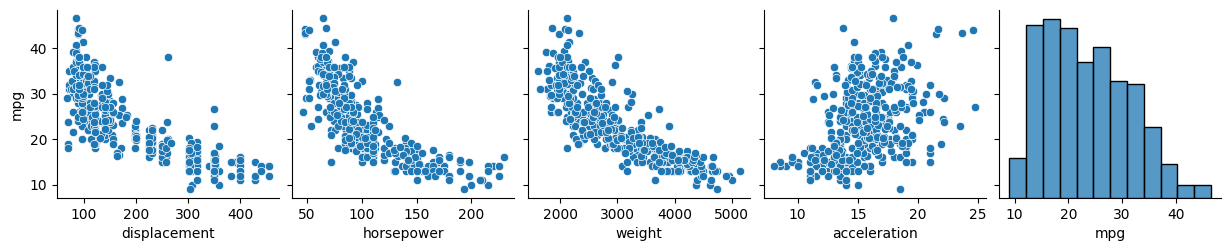

In [18]:
sns.pairplot(data, x_vars=['displacement', 'horsepower', 'weight','acceleration','mpg'], y_vars=['mpg']);

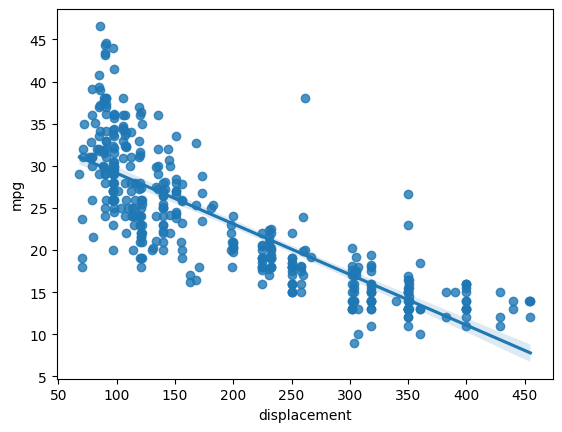

In [19]:
sns.regplot(x='displacement', y='mpg',data=data);

# Define Target Variable (y) and Feature Variables (X)



In [20]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [21]:
y=data['mpg']

In [22]:
X=data[['displacement', 'horsepower', 'weight','acceleration']]

In [25]:
X

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


import numpy as np
from google.colab import autoviz
df_1401233308886670564 = autoviz.get_df('df_1401233308886670564')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1401233308886670564, *['displacement'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1401233308886670564 = autoviz.get_df('df_1401233308886670564')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1401233308886670564, *['horsepower'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1401233308886670564 = autoviz.get_df('df_1401233308886670564')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1401233308886670564, *['weight'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1401233308886670564 = autoviz.get_df('df_1401233308886670564')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1401233308886670564, *['acceleration'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1401233308886670564 = autoviz.get_df('df_1401233308886670564')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1401233308886670564, *['displacement'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1401233308886670564 = autoviz.get_df('df_1401233308886670564')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1401233308886670564, *['horsepower'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1401233308886670564 = autoviz.get_df('df_1401233308886670564')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1401233308886670564, *['weight'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1401233308886670564 = autoviz.get_df('df_1401233308886670564')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1401233308886670564, *['acceleration'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1401233308886670564 = autoviz.get_df('df_1401233308886670564')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1401233308886670564, *[[['displacement', 'horsepower'], ['horsepower', 'weight'], ['weight', 'acceleration']]], **{})
chart

# Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=2529)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((274, 4), (118, 4), (274,), (118,))

# Linear Regression Model

In [36]:
from sklearn.linear_model import LinearRegression

In [40]:
model=LinearRegression()

## Training/Fitting model

In [41]:
model.fit(X_train, y_train)

LinearRegression()

In [42]:
model.intercept_

45.10570942699835

In [43]:
model.coef_

array([-0.0101203 , -0.04389329, -0.00484238, -0.04171959])

The above simply means that out Mileage will be calculated as follows:
Mileage = 45.105 - 0.01*Displacement - 0.04*Horsepower - 0.0048*Weight - 0.041*Accerelation + error


# Prediction

In [44]:
y_pred = model.predict(X_test)

In [45]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

# Model Evaluation / Accuracy

In [55]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [47]:
mae = mean_absolute_error(y_test,y_pred)

In [48]:
mape = mean_absolute_percentage_error(y_test, y_pred)

In [49]:
mse = r2_score(y_test, y_pred)

In [51]:
print(mae)
print(mape)
print(mse)

3.3286968643244115
0.14713035779536746
0.7031250746717691


In [52]:
print("The Accuracy of the model is ",100-mape*100,"%")

The Accuracy of the model is  85.28696422046326 %


# Explanation
At the end of the Mileage Prediction - Regression Analysis project, we have successfully developed a robust regression model that delivers impressive accuracy. The evaluation of our model on both the training and test datasets reveals that it achieves an outstanding accuracy of 85.2869%.